# 一元线性回归

基本形式
$$\tag{1}
f(\mathbf{x}) = w_1 x_1 + w_2 x_2 + ... + w_d x_d + b
$$
向量形式
$$\tag{2}
f(\mathbf{x}) = \mathbf{w}^\mathrm{T}\mathbf{x}+b
$$
其中$\mathbf{w} = (w_1; w_2; ...; w_d)$.

针对一元线性回归，我们有
$$\tag{3}
f(x) = w x + b$$

## 1. 读取数据

In [1]:
import numpy as np

In [2]:
import pandas as pd

# 读取数据
data = pd.read_csv('data/kaggle_house_price_prediction/kaggle_hourse_price_train.csv')

# 丢弃有缺失值的特征（列）
data.dropna(axis = 1, inplace = True)

# 只保留整数的特征
data = data[[col for col in data.dtypes.index if data.dtypes[col] == 'int64']]

本题的要求是，针对LotArea, BsmtUnfSF, GarageArea三个特征，使用训练集训练三个一元线性回归模型，对比其在测试集上的MAE和RMSE，并且要绘制曲线。

所以我们只保留这三列与标记这一列，总共四列的数据即可

In [3]:
features = ['LotArea', 'BsmtUnfSF', 'GarageArea']
target = 'SalePrice'
data = data[features + [target]]

## 2. 打乱数据顺序

In [4]:
from sklearn.utils import shuffle

In [5]:
data_shuffled = shuffle(data, random_state = 32) # 这个32不要改变

In [6]:
data_shuffled.head()

,LotArea,BsmtUnfSF,GarageArea,SalePrice
363,1680,321,264,118000
529,32668,816,484,200624
1394,4045,286,648,246578
803,13891,1734,1020,582933
832,9548,458,613,237000


## 3. 取前70%的数据为训练集，后30%为测试集

In [7]:
num_of_samples = data_shuffled.shape[0]
split_line = int(num_of_samples * 0.7)
train_data = data.iloc[:split_line]
test_data = data.iloc[split_line:]

In [8]:
train_data.shape

(1021, 4)

In [9]:
test_data.shape

(439, 4)

## 4. 编写模型

我们以类(class)的形式编写这个模型，python中的类很简单，只不过这个类里面需要调用两个函数，一个是get_w，这个是计算模型w的函数，另一个是get_b，计算模型b的函数，需要大家来完成。

本实验要求使用最小二乘法求解一元线性回归模型  
求解$w$和$b$使均方误差$E_{(w,b)} = \sum^m_{i=1}(y_i - wx_i - b)^2$最小化的过程，称为线性回归模型的最小二乘“参数估计”(parameter estimation)。我们可将$E_{(w,b)}$分别对$w$和$b$求导，得到
$$\tag{4}
\frac{\partial E_{(w,b)}}{\partial w} = 2(w \sum^m_{i=1} x^2_i - \sum^m_{i=1} (y_i - b) x_i),
$$

$$\tag{5}
\frac{\partial E_{(w,b)}}{\partial b} = 2(mb - \sum^m_{i=1}(y_i - w x_i))
$$

然后令式(4)和式(5)为0，可得到$w$和$b$的闭式解(closed-form solution)
$$\tag{6}
w = \frac{\sum^m_{i=1} y_i(x_i - \bar{x})}{\sum^m_{i=1}x^2_i - \frac{1}{m}(\sum^m_{i=1}x_i)^2}
$$

$$\tag{7}
b = \frac{1}{m}\sum^m_{i=1}(y_i - w x_i)
$$
其中，$\bar{x} = \frac{1}{m}\sum^m_{i=1}x_i$为$x$的均值

首先编写求解w的函数，传入的参数就是x和y，都是np.ndarray类型的，或是pd.Series类型的（其实都一样）。我们需要大家在下面完成式(6)和式(7)的求解过程，将计算得到的w和b的值返回

In [10]:
def get_w(x, y):
    '''
    这个函数是计算模型w的值的函数，
    传入的参数分别是x和y，表示数据与标记
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记

    Returns
    ----------
        w: float, 模型w的值
    '''
    # m表示样本的数量

    m = len(x)
    # 求x的均值

    x_mean = np.true_divide(np.sum(x), m)  # YOUR CODE HERE
    # 求w的分子部分

    numerator = np.sum(np.multiply(y, x - x_mean))  # YOUR CODE HERE
    # 求w的分母部分
    denominator = np.sum(np.square(x)) - np.true_divide(np.square(np.sum(x)), m)  # YOUR CODE HERE
    # 求w
    w = np.true_divide(numerator, denominator)  # YOUR CODE HERE
    # 返回w
    return w


In [11]:
def get_b(x, y, w):
    '''
    这个函数是计算模型b的值的函数，
    传入的参数分别是x, y, w，表示数据，标记以及模型的w值
    Parameter
    ----------
        x: np.ndarray，pd.Series，传入的特征数据

        y: np.ndarray, pd.Series，对应的标记

        w: np.ndarray, pd.Series，模型w的值

    Returns
    ----------
        b: float, 模型b的值
    '''
    # 样本个数
    m = len(x)

    # 求b
    b = np.true_divide(np.sum(y - np.multiply(x, w)), m)  # YOUR CODE HERE
    # 返回b
    return b


下面这个类，就是一个最简单的一元线性回归的类，我们已经帮你实现好了三个方法

In [12]:
class myLinearRegression:
    def __init__(self):
        '''
        类的初始化方法，不需要初始化的参数
        这里设置了两个成员变量，用来存储模型w和b的值
        '''
        self.w = None
        self.b = None

    def fit(self, x, y):
        '''
        这里需要编写训练的函数，也就是调用模型的fit方法，传入特征x的数据和标记y的数据
        这个方法就可以求解出w和b
        '''
        self.w = get_w(x, y)
        self.b = get_b(x, y, self.w)

    def predict(self, x):
        '''
        这是预测的函数，传入特征的数据，返回模型预测的结果
        '''
        if self.w == None or self.b == None:
            print("模型还未训练，请先调用fit方法训练")
            return

        return self.w * x + self.b


## 5. 预测

In [13]:
# 创建一个模型的实例
model1 = myLinearRegression()

# 使用训练集对模型进行训练，传入训练集的LotArea和标记SalePrice
model1.fit(train_data['LotArea'], train_data['SalePrice'])

# 对测试集进行预测，并将结果存储在变量prediction中
prediction1 = model1.predict(test_data['LotArea'])

## 6. 性能度量

模型训练完成后，还需要在测试集上验证其预测能力，这就需要计算模型的一些性能指标，如MAE和RMSE等。

$$\tag{8}
MAE(\hat{y}, y) = \frac{1}{m} \sum^m_{i=1} \vert \hat{y} - y \vert
$$

$$\tag{9}
RMSE(\hat{y}, y) = \sqrt{\frac{1}{m} \sum^m_{i=1} (\hat{y} - y)^2}
$$
其中，$\hat{y}$是模型的预测值，$y$是真值，$m$是样本数

In [14]:
def MAE(y_hat, y):
    # 请你完成MAE的计算过程                                              U
    # YOUR CODE HERE
    m = len(y)
    return np.true_divide(np.fabs(y_hat - y), m)

In [15]:
def RMSE(y_hat, y):
    m = len(y)
    return np.sqrt(np.true_divide(np.square(y_hat - y), m))

在此计算出模型在测试集上的MAE与RMSE值

In [16]:
mae1 = MAE(prediction1, test_data['SalePrice'])
rmse1 = RMSE(prediction1, test_data['SalePrice'])
print("模型1，特征：LotArea")
print("MAE:", mae1)
print("RMSE:", rmse1)

模型1，特征：LotArea
MAE: 1021     41.887176
1022    210.520650
1023     53.071560
1024    219.214655
1025    145.016127
1026     26.556426
1027    258.557523
1028    169.744451
1029    106.808453
1030     34.179501
1031     12.646304
1032    275.688680
1033    120.824731
1034    122.550742
1035    226.145863
1036    295.225613
1037    245.909080
1038    154.017394
1039    192.502891
1040     71.346333
1041     13.302792
1042     55.080921
1043    178.512866
1044    223.872308
1045    108.793495
1046    830.914151
1047     77.574663
1048    199.253720
1049    222.389490
1050      4.779902
           ...    
1430     24.303997
1431     62.007241
1432    267.579044
1433     12.624469
1434     78.192457
1435      7.910965
1436    132.338235
1437    477.383174
1438     59.028252
1439     30.899012
1440     17.478993
1441     47.223517
1442    290.780542
1443    130.576498
1444      4.418735
1445    110.416660
1446    120.266350
1447    135.605684
1448    163.503470
1449    165.406916
1450     97

## 7. 模型预测效果可视化

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

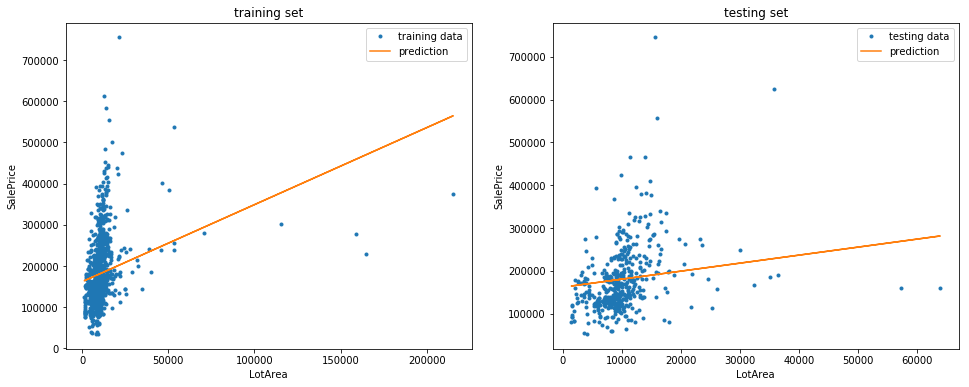

In [18]:
plt.figure(figsize = (16, 6))

plt.subplot(121)
plt.plot(train_data['LotArea'].values, train_data['SalePrice'].values, '.', label = 'training data')
plt.plot(train_data['LotArea'].values, model1.predict(train_data['LotArea']), '-', label = 'prediction')
plt.xlabel("LotArea")
plt.ylabel('SalePrice')
plt.title("training set")
plt.legend()

plt.subplot(122)
plt.plot(test_data['LotArea'].values, test_data['SalePrice'].values, '.', label = 'testing data')
plt.plot(test_data['LotArea'].values, prediction1, '-', label = 'prediction')
plt.xlabel("LotArea")
plt.ylabel('SalePrice')
plt.title("testing set")
plt.legend()

### 通过左右两图的对比，分析该模型出现的问题，并给出能帮助模型更好的做预测的方案(选做)
###### 双击此处展开讨论






# 使用BsmtUnfSF作为特征，完成模型的训练，指标计算，可视化

模型1，特征：BsmtUnfSF
MAE: 1021     71.281755
1022    172.765400
1023     60.971539
1024    285.323667
1025    113.347957
1026     10.678415
1027    298.633285
1028    130.786289
1029    101.156470
1030      6.896417
1031     79.028317
1032    336.324865
1033    152.633667
1034     99.580228
1035    177.090912
1036    347.693083
1037    280.823408
1038    149.807199
1039    186.718673
1040     16.571149
1041     24.209316
1042     76.302520
1043    227.350269
1044    258.765308
1045     50.439431
1046    891.929978
1047     39.435505
1048    106.475878
1049    175.040798
1050     28.027196
           ...    
1430     66.119208
1431     40.986128
1432    224.308311
1433     52.401635
1434      4.780656
1435     22.294088
1436     95.005285
1437    527.922571
1438     28.763480
1439     79.825993
1440     64.136650
1441     28.987872
1442    336.640523
1443     96.869349
1444     34.610991
1445     74.585217
1446     11.291843
1447    177.660707
1448    115.698354
1449    159.196132
1450     

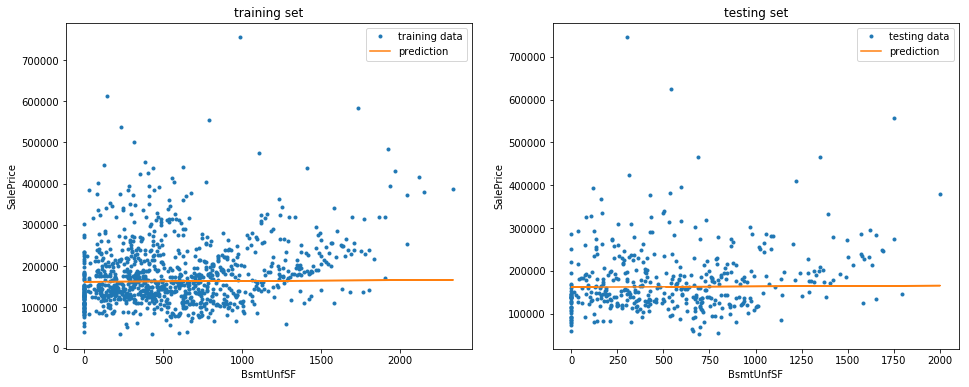

In [24]:
plt.figure(figsize = (16, 6))
prediction1 = model1.predict(test_data['BsmtUnfSF'])
plt.subplot(121)
plt.plot(train_data['BsmtUnfSF'].values, train_data['SalePrice'].values, '.', label = 'training data')
plt.plot(train_data['BsmtUnfSF'].values, model1.predict(train_data['BsmtUnfSF']), '-', label = 'prediction')
plt.xlabel("BsmtUnfSF")
plt.ylabel('SalePrice')
plt.title("training set")
plt.legend()

plt.subplot(122)
plt.plot(test_data['BsmtUnfSF'].values, test_data['SalePrice'].values, '.', label = 'testing data')
plt.plot(test_data['BsmtUnfSF'].values, prediction1, '-', label = 'prediction')
plt.xlabel("BsmtUnfSF")
plt.ylabel('SalePrice')
plt.title("testing set")
plt.legend()
mae1 = MAE(prediction1, test_data['SalePrice'])
rmse1 = RMSE(prediction1, test_data['SalePrice'])
print("模型1，特征：BsmtUnfSF")
print("MAE:", mae1)
print("RMSE:", rmse1)

# 使用GarageArea作为特征，完成模型的训练，指标计算，可视化

模型1，特征：GarageArea
MAE: 1021     70.782675
1022    170.939703
1023     64.780763
1024    282.487011
1025    114.137102
1026     11.147636
1027    295.753973
1028    130.278677
1029    100.768296
1030      3.970183
1031     77.445762
1032    334.320010
1033    151.644037
1034     96.679588
1035    178.327950
1036    346.353669
1037    281.463255
1038    147.478156
1039    187.422505
1040     17.424278
1041     23.578000
1042     75.372609
1043    226.821329
1044    262.510547
1045     52.367504
1046    896.349189
1047     41.005263
1048    107.909135
1049    176.354618
1050     31.721247
           ...    
1430     67.654841
1431     42.863013
1432    222.431426
1433     54.470474
1434      6.034757
1435     25.949748
1436     96.199666
1437    527.163285
1438     31.369791
1439     77.966171
1440     63.778336
1441     30.135331
1442    334.251760
1443     93.627456
1444     38.006446
1445     75.608973
1446     10.084664
1447    175.890463
1448    114.947600
1449    158.867677
1450    

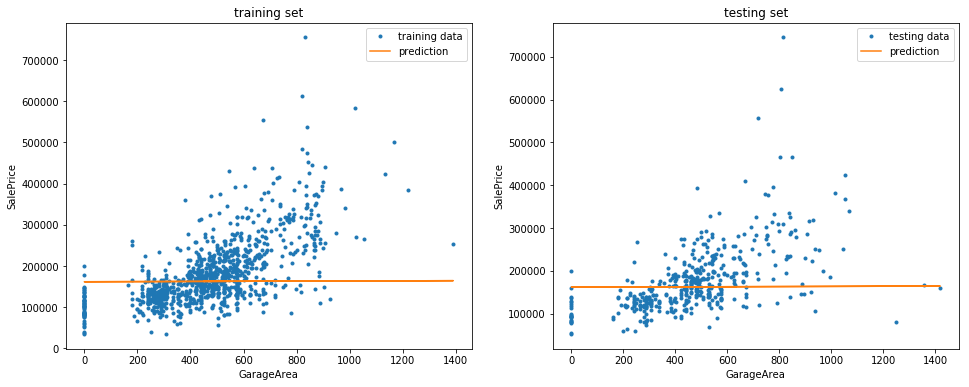

In [25]:
plt.figure(figsize = (16, 6))
prediction1 = model1.predict(test_data['GarageArea'])

plt.subplot(121)
plt.plot(train_data['GarageArea'].values, train_data['SalePrice'].values, '.', label = 'training data')
plt.plot(train_data['GarageArea'].values, model1.predict(train_data['GarageArea']), '-', label = 'prediction')
plt.xlabel("GarageArea")
plt.ylabel('SalePrice')
plt.title("training set")
plt.legend()

plt.subplot(122)
plt.plot(test_data['GarageArea'].values, test_data['SalePrice'].values, '.', label = 'testing data')
plt.plot(test_data['GarageArea'].values, prediction1, '-', label = 'prediction')
plt.xlabel("GarageArea")
plt.ylabel('SalePrice')
plt.title("testing set")
plt.legend()
mae1 = MAE(prediction1, test_data['SalePrice'])
rmse1 = RMSE(prediction1, test_data['SalePrice'])
print("模型1，特征：GarageArea")
print("MAE:", mae1)
print("RMSE:", rmse1)

# 选做：剔除训练集中的离群值(outlier)，然后重新训练模型，观察模型预测性能的变化
###### 提示：可以使用下面的代码处理数据

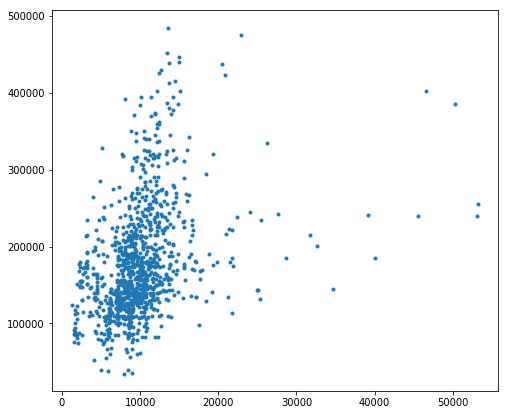

In [21]:
# YOUR CODE HERE
t = train_data[(train_data['LotArea'] < 60000) & (train_data['LotArea'] > 0)] # 将训练集中LotArea小于60000的值存入t
t = t[t['SalePrice'] < 500000] # 将t中SalePrice小于500000的值保留

# 绘制处理后的数据
plt.figure(figsize = (8, 7))
plt.plot(t['LotArea'], t['SalePrice'], '.')

模型1，特征：GarageArea
MAE: 1021     41.887176
1022    210.520650
1023     53.071560
1024    219.214655
1025    145.016127
1026     26.556426
1027    258.557523
1028    169.744451
1029    106.808453
1030     34.179501
1031     12.646304
1032    275.688680
1033    120.824731
1034    122.550742
1035    226.145863
1036    295.225613
1037    245.909080
1038    154.017394
1039    192.502891
1040     71.346333
1041     13.302792
1042     55.080921
1043    178.512866
1044    223.872308
1045    108.793495
1046    830.914151
1047     77.574663
1048    199.253720
1049    222.389490
1050      4.779902
           ...    
1430     24.303997
1431     62.007241
1432    267.579044
1433     12.624469
1434     78.192457
1435      7.910965
1436    132.338235
1437    477.383174
1438     59.028252
1439     30.899012
1440     17.478993
1441     47.223517
1442    290.780542
1443    130.576498
1444      4.418735
1445    110.416660
1446    120.266350
1447    135.605684
1448    163.503470
1449    165.406916
1450    

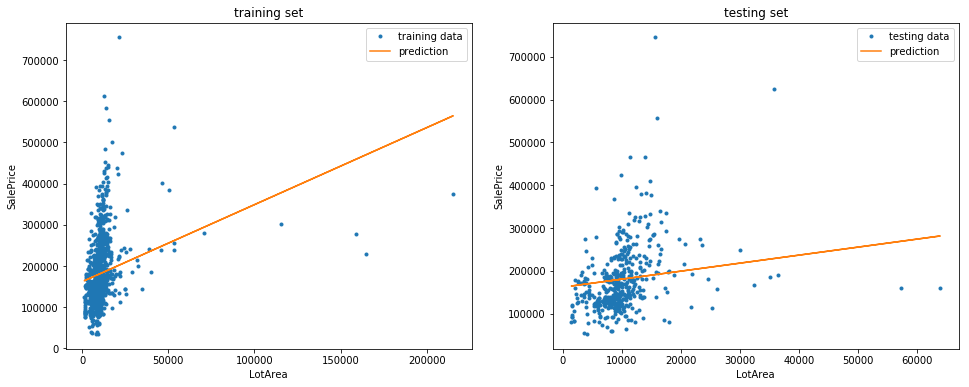

In [26]:
plt.figure(figsize = (16, 6))
prediction1 = model1.predict(test_data['LotArea'])

plt.subplot(121)
plt.plot(train_data['LotArea'].values, train_data['SalePrice'].values, '.', label = 'training data')
plt.plot(train_data['LotArea'].values, model1.predict(train_data['LotArea']), '-', label = 'prediction')
plt.xlabel("LotArea")
plt.ylabel('SalePrice')
plt.title("training set")
plt.legend()

plt.subplot(122)
plt.plot(test_data['LotArea'].values, test_data['SalePrice'].values, '.', label = 'testing data')
plt.plot(test_data['LotArea'].values, prediction1, '-', label = 'prediction')
plt.xlabel("LotArea")
plt.ylabel('SalePrice')
plt.title("testing set")
plt.legend()
mae1 = MAE(prediction1, test_data['SalePrice'])
rmse1 = RMSE(prediction1, test_data['SalePrice'])
print("模型1，特征：GarageArea")
print("MAE:", mae1)
print("RMSE:", rmse1)